# Carga Librerias

In [46]:
# Librerias
import warnings
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px 

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, plot_roc_curve


In [41]:
def plot_metrics(model, x, y, pred_y, num=None):
    y = label_scaler_cut.inverse_transform(y)
    pred_y = label_scaler_cut.inverse_transform(pred_y.reshape(-1, 1))
    print('R^2 score:\t', r2_score(y, pred_y))
    print('MSE:\t\t', mean_squared_error(y, pred_y))
    print('RMSE:\t\t', mean_squared_error(y, pred_y, squared=False))
    print('MAE:\t\t', mean_absolute_error(y, pred_y))

    fig, ax = plt.subplots(1)
    matplotlib.rc('figure', figsize=(15, 5))
    if num == None:
        ax.plot(y, label='Test')
        ax.plot(pred_y, label='Predicted')
    else:
        ax.plot(y[:num], label='Test')
        ax.plot(pred_y[:num], label='Predicted')
    ax.legend(loc='upper right')
    ax.set_xlabel('Sample')
    ax.set_ylabel('RUL')

---
# Carga Datos

In [3]:
DATA_DIR = "C:/Users/NetRunner/OneDrive/UOC/Semestre 6/TFM/MultipleDatasets"

train_data_cut = pd.read_csv(f"{DATA_DIR}/train_data.csv")
test_data_cut = pd.read_csv(f"{DATA_DIR}/test_data.csv")

train_data_uncut = pd.read_csv(f"{DATA_DIR}/train_data_uncut.csv")
test_data_uncut = pd.read_csv(f"{DATA_DIR}/test_data_uncut.csv")

# X_train = pd.read_csv(f"{DATA_DIR}/X_train.csv")
# y_train = pd.read_csv(f"{DATA_DIR}/y_train.csv")
# X_test = pd.read_csv(f"{DATA_DIR}/X_test.csv")
# y_test = pd.read_csv(f"{DATA_DIR}/y_test.csv")

In [4]:
data_cut = pd.concat([train_data_cut, test_data_cut])
data_uncut = pd.concat([train_data_uncut, test_data_uncut])

features = ['volt', 'rotate', 'pressure', 'vibration', 'error1', 'error2', 'error3',
           'error4', 'error5', 'volt_3h_mean', 'rotate_3h_mean',
           'pressure_3h_mean', 'vibration_3h_mean', 'volt_24h_mean',
           'rotate_24h_mean', 'pressure_24h_mean', 'vibration_24h_mean',
           'error1_count', 'error2_count', 'error3_count', 'error4_count',
           'error5_count']
label = ['RUL']

data_cut = data_cut[features+label]
data_uncut = data_uncut[features+label]

## Normalización de datos MinMax

In [5]:
feature_scaler_cut = MinMaxScaler(feature_range=(0,1))
label_scaler_cut = MinMaxScaler(feature_range=(0,1))

feature_scaler_cut.fit(data_cut[features])
label_scaler_cut.fit(data_cut[label].values.reshape(-1,1))

MinMaxScaler()

In [6]:
feature_scaler_uncut = MinMaxScaler(feature_range=(0,1))
label_scaler_uncut = MinMaxScaler(feature_range=(0,1))

feature_scaler_uncut.fit(data_uncut[features])
label_scaler_uncut.fit(data_uncut[label].values.reshape(-1,1))

MinMaxScaler()

In [7]:
data_norm_cut = data_cut.copy()
data_norm_cut[features] = feature_scaler_cut.transform(data_cut[features])
data_norm_cut[label] = label_scaler_cut.transform(data_cut[label].values.reshape(-1,1))

data_norm_uncut = data_uncut.copy()
data_norm_uncut[features] = feature_scaler_uncut.transform(data_uncut[features])
data_norm_uncut[label] = label_scaler_uncut.transform(data_uncut[label].values.reshape(-1,1))

## Dataset Train/Test

In [8]:
X_train_cut, X_test_cut, y_train_cut, y_test_cut = train_test_split(data_norm_cut[features], data_norm_cut[label], test_size=0.25, random_state=42)

In [9]:
X_train_uncut, X_test_uncut, y_train_uncut, y_test_uncut = train_test_split(data_norm_uncut[features], data_norm_uncut[label], test_size=0.25, random_state=42)

---
# Control/Swap de variables
  
Esta celda sirve para pasar de los datos con ciclos homogenizados al conjunto entero con todos los ciclos sin homogenizar

In [10]:
# Cut cycles
X_train = X_train_cut
y_train = y_train_cut
X_test = X_test_cut
y_test = y_test_cut

# Uncut cycles
# X_train = X_train_uncut
# y_train = y_train_uncut
# X_test = X_test_uncut
# y_test = y_test_uncut


In [11]:
X_train.shape

(15660, 22)

---
# Linear Regression

In [12]:
model_lr = LinearRegression().fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

R^2 score:	 0.1144642317506801
MSE:		 38741.55671118559
RMSE:		 196.82874970691043
MAE:		 168.9056132754435


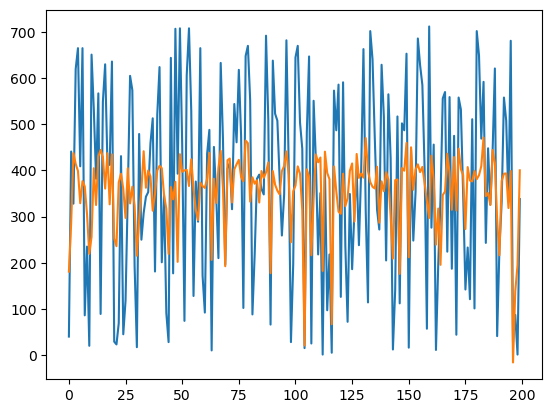

In [13]:
plot_metrics(model_lr, X_test, y_test.values, pred_lr, 200)

Text(0, 0.5, 'State')

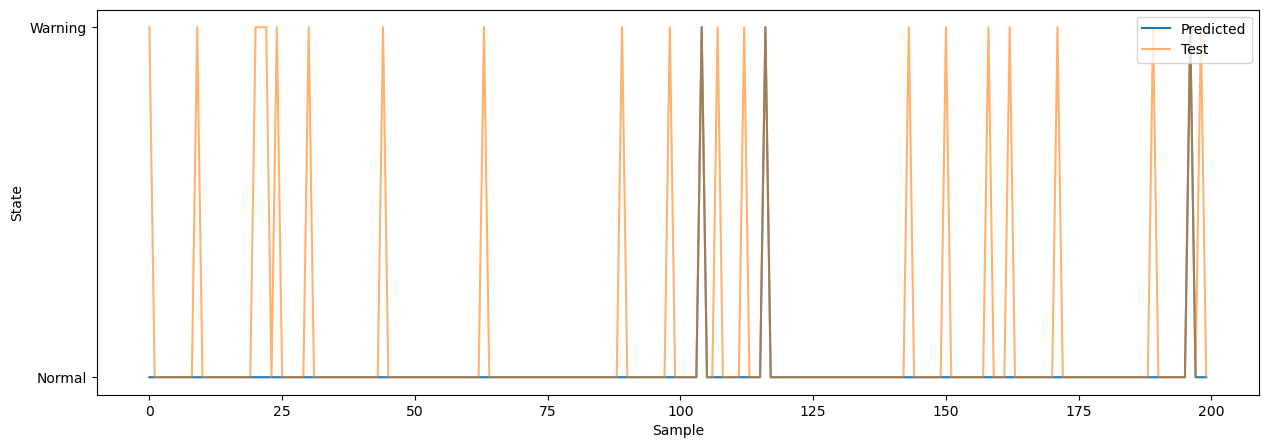

In [40]:
pred_lr_inv = label_scaler_cut.inverse_transform(pred_lr.reshape(-1, 1))
y_test_cut_inv = label_scaler_cut.inverse_transform(y_test_cut.values.reshape(-1, 1))

y_test_cut_inv_class = ['Normal' if x >= 72 else 'Warning' for x in y_test_cut_inv]
pred_lr_inv_class = ['Normal' if x >= 72 else 'Warning' for x in pred_lr_inv]

plt.plot(pred_lr_inv_class[:200], label='Predicted')
plt.plot(y_test_cut_inv_class[:200], alpha = 0.6, label='Test')
plt.legend(loc='upper right')
plt.yticks([0, 1], ['Normal', 'Warning'])
plt.xlabel('Sample')
plt.ylabel('State')

Accuracy:  0.9003831417624522


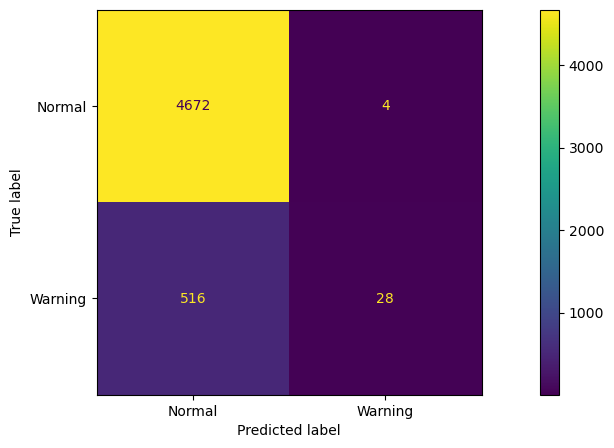

In [15]:
lr_cm = confusion_matrix(y_test_cut_inv_class, pred_lr_inv_class)

print('Accuracy: ', accuracy_score(y_test_cut_inv_class, pred_lr_inv_class))
ConfusionMatrixDisplay(lr_cm, display_labels=['Normal', 'Warning']).plot()

---
# SVM Regressor

In [16]:
model_svm = svm.SVR().fit(X_train, y_train.to_numpy().ravel())
pred_svm = model_svm.predict(X_test)

R^2 score:	 0.46565953671538574
MSE:		 23377.01322031039
RMSE:		 152.89543230688872
MAE:		 122.3286358137451


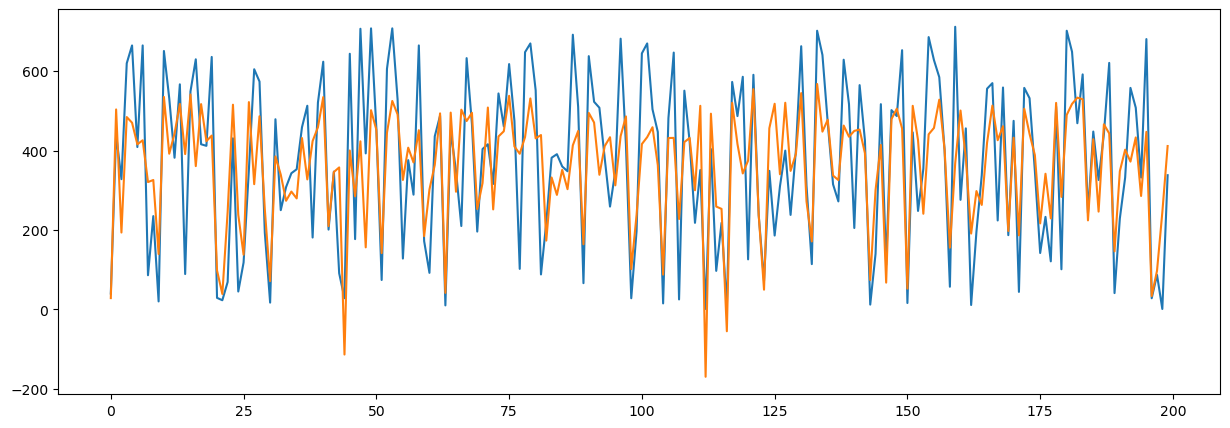

In [17]:
plot_metrics(model_svm, X_test, y_test.values, pred_svm, 200)

Text(0, 0.5, 'State')

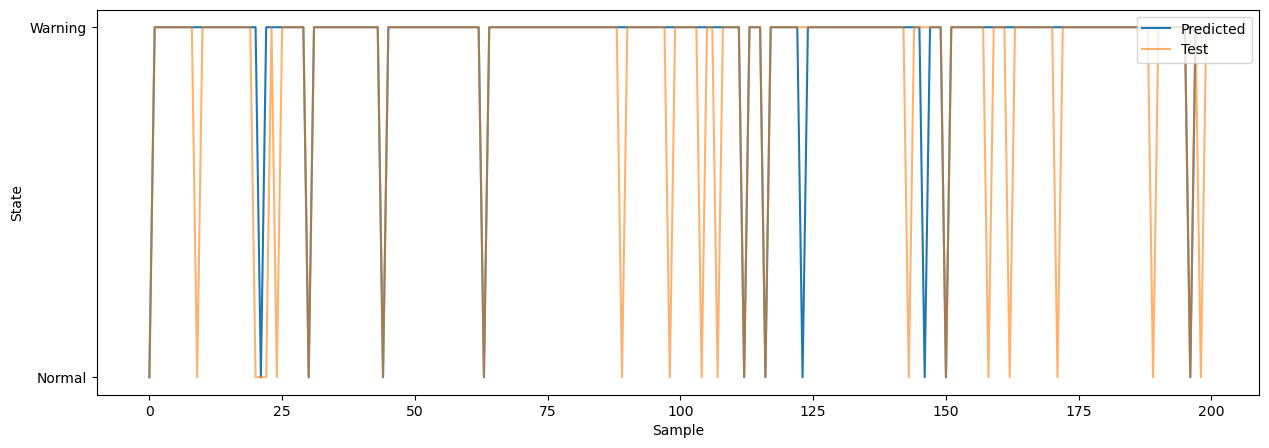

In [18]:
pred_svm_inv = label_scaler_cut.inverse_transform(pred_svm.reshape(-1, 1))
y_test_cut_inv = label_scaler_cut.inverse_transform(y_test_cut.values.reshape(-1, 1))

y_test_cut_inv_class = ['Normal' if x >= 72 else 'Warning' for x in y_test_cut_inv]
pred_svm_inv_class = ['Normal' if x >= 72 else 'Warning' for x in pred_svm_inv]


plt.plot(pred_svm_inv_class[:200], label='Predicted')
plt.plot(y_test_cut_inv_class[:200], alpha = 0.6, label='Test')
plt.legend(loc='upper right')
plt.yticks([0, 1], ['Normal', 'Warning'])
plt.xlabel('Sample')
plt.ylabel('State')

Accuracy:  0.9287356321839081


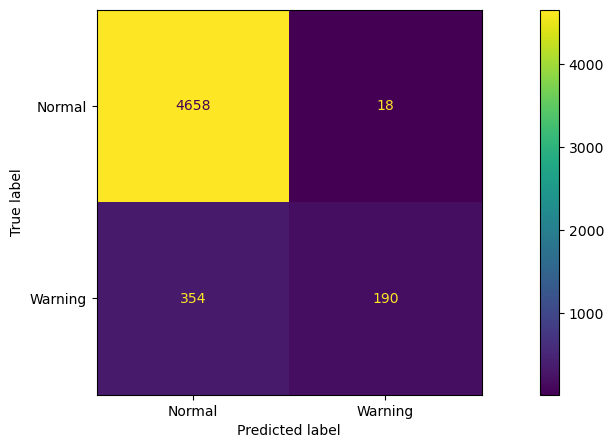

In [19]:
svm_cm = confusion_matrix(y_test_cut_inv_class, pred_svm_inv_class)

print('Accuracy: ', accuracy_score(y_test_cut_inv_class, pred_svm_inv_class))
ConfusionMatrixDisplay(svm_cm, display_labels=['Normal', 'Warning']).plot()

---
# Random Forest Regressor

In [20]:
model_rf = RandomForestRegressor().fit(X_train, y_train.to_numpy().ravel())
pred_rf = model_rf.predict(X_test)

R^2 score:	 0.7516452687595578
MSE:		 10865.341920478926
RMSE:		 104.23695084027989
MAE:		 70.9238295019157


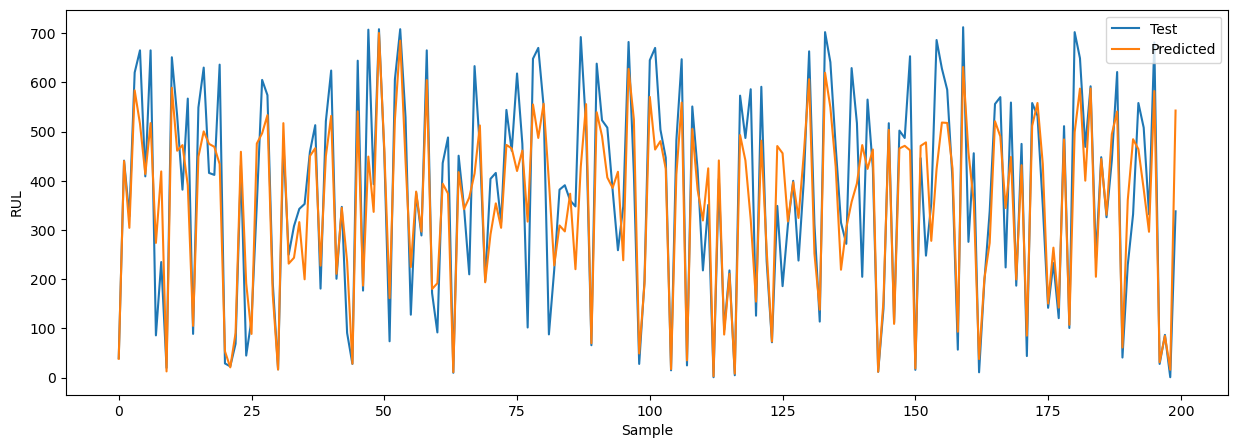

In [42]:
plot_metrics(model_rf, X_test, y_test.values, pred_rf, 200)

Text(0, 0.5, 'State')

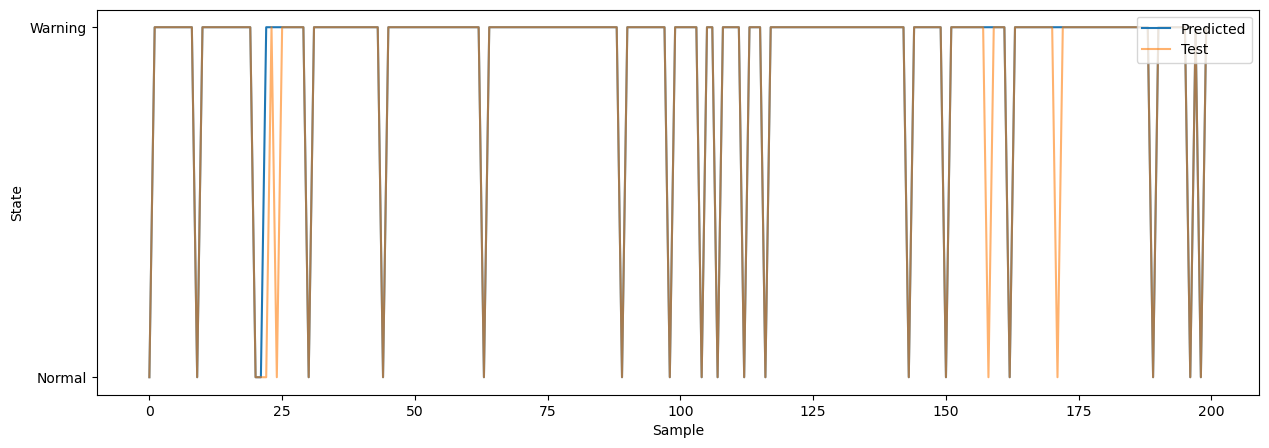

In [22]:
pred_rf_inv = label_scaler_cut.inverse_transform(pred_rf.reshape(-1, 1))
y_test_cut_inv = label_scaler_cut.inverse_transform(y_test_cut.values.reshape(-1, 1))

y_test_cut_inv_class = ['Normal' if x >= 72 else 'Warning' for x in y_test_cut_inv]
pred_rf_inv_class = ['Normal' if x >= 72 else 'Warning' for x in pred_rf_inv]


plt.plot(pred_rf_inv_class[:200], label='Predicted')
plt.plot(y_test_cut_inv_class[:200], alpha = 0.6, label='Test')
plt.legend(loc='upper right')
plt.yticks([0, 1], ['Normal', 'Warning'])
plt.xlabel('Sample')
plt.ylabel('State')

Accuracy:	 0.9630268199233717
Precision:	 0.9888579387186629
Recall:		 0.6525735294117647
F1 score:	 0.7862679955703211
ROC AUC score:	 0.8258590487093042


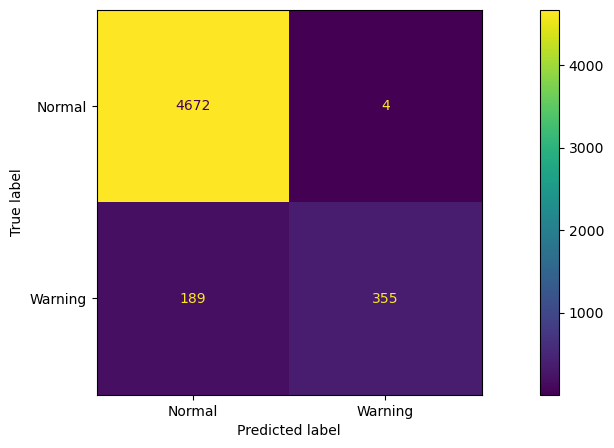

In [127]:
y_test_cut_inv_class_1 = [0 if x >= 72 else 1 for x in y_test_cut_inv]
pred_rf_inv_class_1 = [0 if x >= 72 else 1 for x in pred_rf_inv]

rf_cm = confusion_matrix(y_test_cut_inv_class_1, pred_rf_inv_class_1)

print('Accuracy:\t', accuracy_score(y_test_cut_inv_class_1, pred_rf_inv_class_1))
print('Precision:\t', precision_score(y_test_cut_inv_class_1, pred_rf_inv_class_1))
print('Recall:\t\t', recall_score(y_test_cut_inv_class_1, pred_rf_inv_class_1))
print('F1 score:\t', f1_score(y_test_cut_inv_class_1, pred_rf_inv_class_1))
print('ROC AUC score:\t', roc_auc_score(y_test_cut_inv_class_1, pred_rf_inv_class_1))
ConfusionMatrixDisplay(rf_cm, display_labels=['Normal', 'Warning']).plot()

---
# Gradient boosting Regressor

In [24]:
model_gb = GradientBoostingRegressor().fit(X_train, y_train.to_numpy().ravel())
pred_gb = model_gb.predict(X_test)

R^2 score:	 0.41590289442455686
MSE:		 25553.83074500421
RMSE:		 159.85565596813962
MAE:		 132.81475399910389


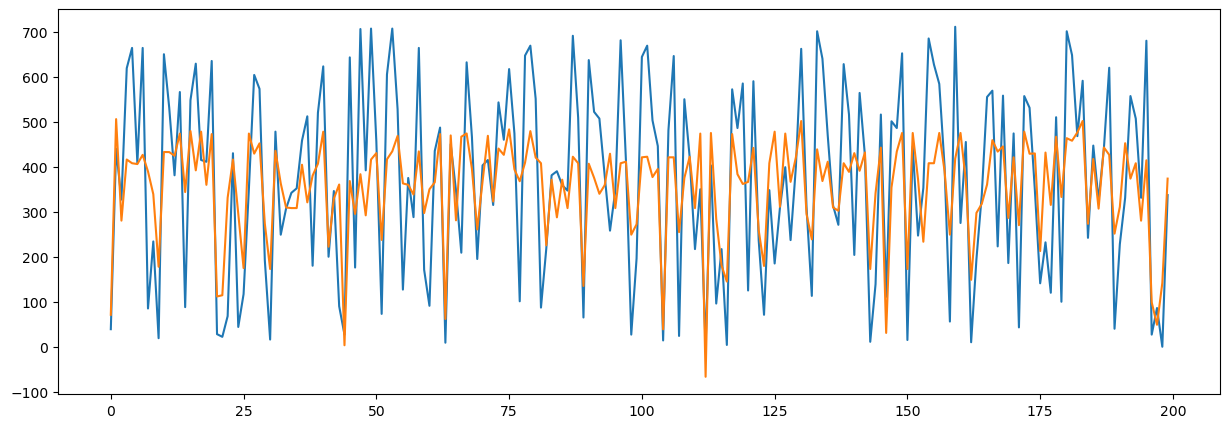

In [25]:
plot_metrics(model_gb, X_test, y_test.values, pred_gb, 200)

Text(0, 0.5, 'State')

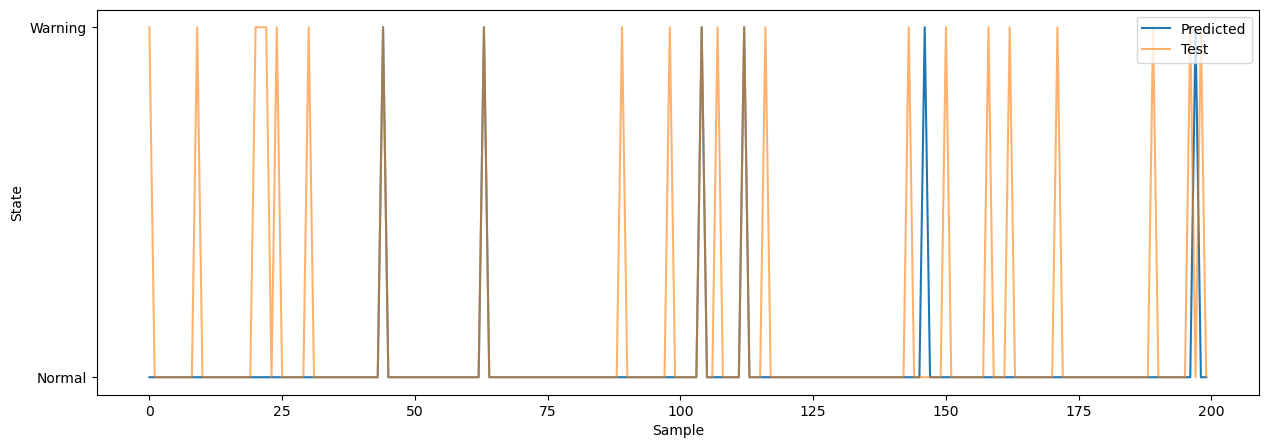

In [26]:
pred_gb_inv = label_scaler_cut.inverse_transform(pred_gb.reshape(-1, 1))
y_test_cut_inv = label_scaler_cut.inverse_transform(y_test_cut.values.reshape(-1, 1))

y_test_cut_inv_class = ['Normal' if x >= 72 else 'Warning' for x in y_test_cut_inv]
pred_gb_inv_class = ['Normal' if x >= 72 else 'Warning' for x in pred_gb_inv]


plt.plot(pred_gb_inv_class[:200], label='Predicted')
plt.plot(y_test_cut_inv_class[:200], alpha = 0.6, label='Test')
plt.legend(loc='upper right')
plt.yticks([0, 1], ['Normal', 'Warning'])
plt.xlabel('Sample')
plt.ylabel('State')

Accuracy:  0.9136015325670498


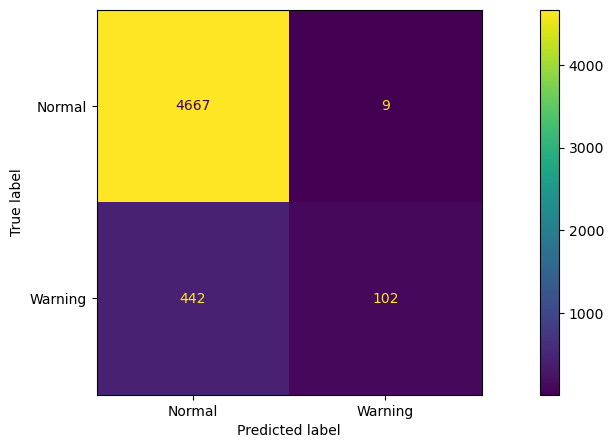

In [27]:
gb_cm = confusion_matrix(y_test_cut_inv_class, pred_gb_inv_class)

print('Accuracy: ', accuracy_score(y_test_cut_inv_class, pred_gb_inv_class))
ConfusionMatrixDisplay(gb_cm, display_labels=['Normal', 'Warning']).plot()

---
# XGBoosting Regressor

In [28]:
model_xgb = XGBRegressor().fit(X_train, y_train.to_numpy().ravel())
pred_xgb = model_xgb.predict(X_test)

R^2 score:	 0.5931441428803499
MSE:		 17799.652850884217
RMSE:		 133.4153396386046
MAE:		 103.31960324410963


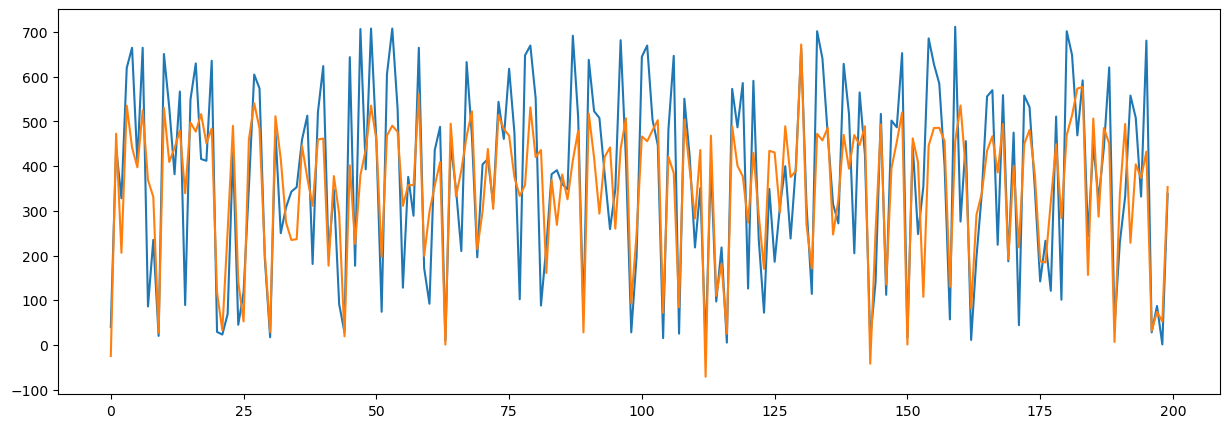

In [29]:
plot_metrics(model_xgb, X_test, y_test.values, pred_xgb, 200)

Text(0, 0.5, 'State')

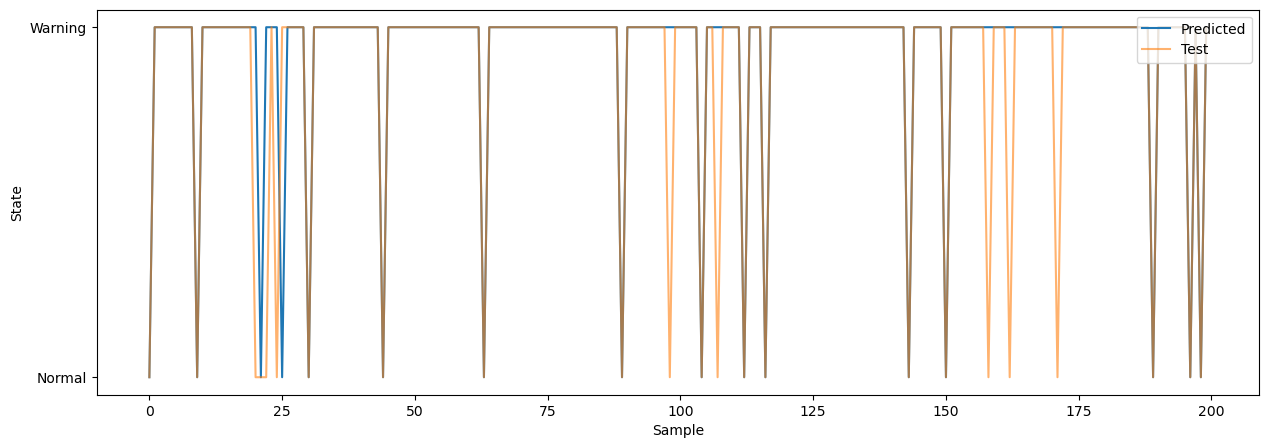

In [30]:
pred_xgb_inv = label_scaler_cut.inverse_transform(pred_xgb.reshape(-1, 1))
y_test_cut_inv = label_scaler_cut.inverse_transform(y_test_cut.values.reshape(-1, 1))

y_test_cut_inv_class = ['Normal' if x >= 72 else 'Warning' for x in y_test_cut_inv]
pred_xgb_inv_class = ['Normal' if x >= 72 else 'Warning' for x in pred_xgb_inv]


plt.plot(pred_xgb_inv_class[:200], label='Predicted')
plt.plot(y_test_cut_inv_class[:200], alpha = 0.6, label='Test')
plt.legend(loc='upper right')
plt.yticks([0, 1], ['Normal', 'Warning'])
plt.xlabel('Sample')
plt.ylabel('State')

Accuracy:  0.9348659003831418


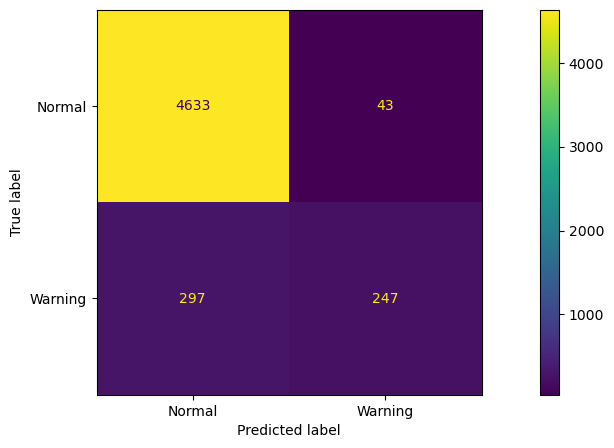

In [31]:
xgb_cm = confusion_matrix(y_test_cut_inv_class, pred_xgb_inv_class)

print('Accuracy: ', accuracy_score(y_test_cut_inv_class, pred_xgb_inv_class))
ConfusionMatrixDisplay(xgb_cm, display_labels=['Normal', 'Warning']).plot()

---
# Prueba conversión a clasificación

In [116]:
test_data_norm_cut = test_data_cut.copy()
test_data_norm_cut[features] = feature_scaler_cut.transform(test_data_cut[features])
test_data_norm_cut[label] = label_scaler_cut.transform(test_data_cut[label].values.reshape(-1,1))

In [117]:
conv_pred_rf = model_rf.predict(test_data_norm_cut[features])

In [118]:
conv_test_y = test_data_cut[label].values.reshape(1, -1)[0]
conv_pred_rf = label_scaler_cut.inverse_transform(conv_pred_rf.reshape(-1, 1))

Text(0, 0.5, 'RUL')

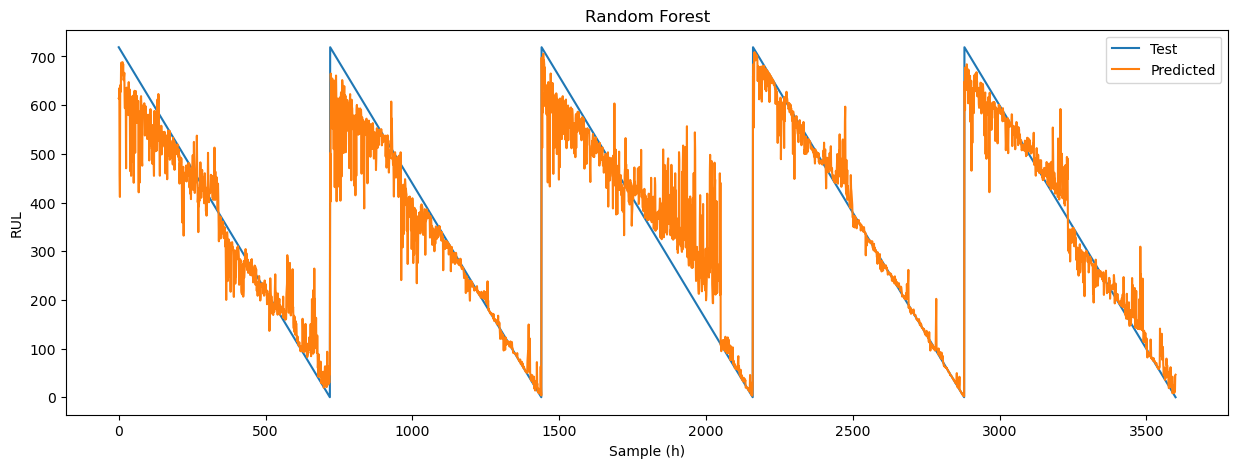

In [119]:
plt.plot(conv_test_y, label='Test')
plt.plot(conv_pred_rf, label='Predicted')
plt.legend(loc='upper right')
plt.title('Random Forest')
plt.xlabel('Sample (h)')
plt.ylabel('RUL')

In [121]:
state_conv_test_y = ['Normal' if x >= 72 else 'Warning' for x in conv_test_y]
state_conv_pred_rf = ['Normal' if x >= 72 else 'Warning' for x in conv_pred_rf]

Text(0, 0.5, 'State')

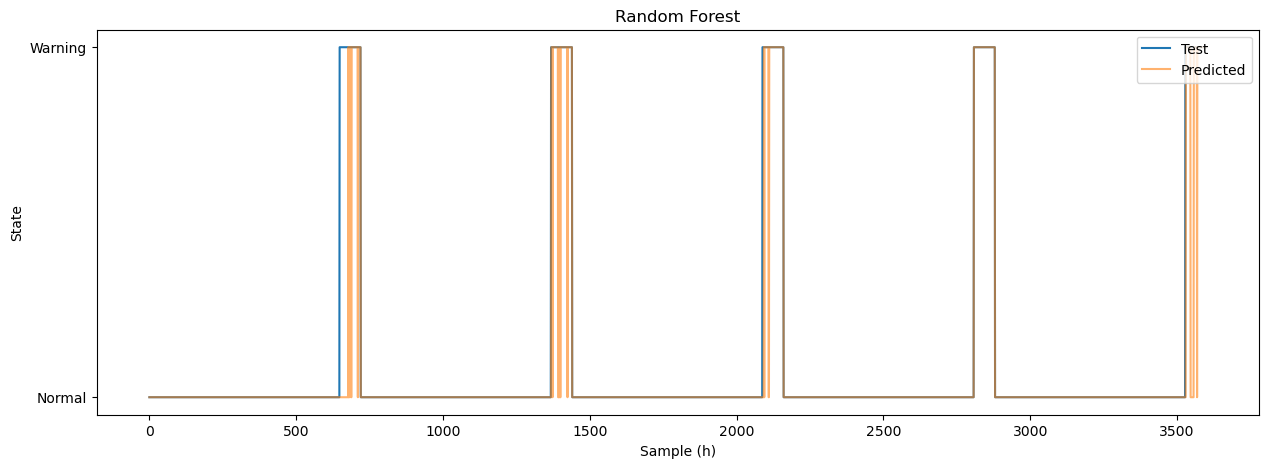

In [125]:
plt.plot(state_conv_test_y, label='Test')
plt.plot(state_conv_pred_rf, alpha=0.6, label='Predicted')
plt.legend(loc='upper right')
plt.title('Random Forest')
plt.xlabel('Sample (h)')
plt.ylabel('State')